In [2]:
import sys
import os

# Agregar la ruta del proyecto (ajusta si tu estructura es diferente)
sys.path.insert(0, os.path.abspath('..'))

# Ahora prueba importar tu librería
from pyhsics import *
from math import cos, sin, radians, sqrt
import numpy as np
import matplotlib.pyplot as plt

rad = radians

print("¡Pyhsics importado correctamente!")

¡Pyhsics importado correctamente!


In [56]:
# V = 12
Va_12 = DirectMeasure(13.58, 0.01, 'V')
Vb_12 = DirectMeasure(12.2, 0.01, 'V')
f1 = CalculatedMeasure('f1 = V2/V1', {'V1': Va_12, 'V2': Vb_12})
repr(f1)

# V = 6
Va_6 = DirectMeasure(6.70, 0.01, 'V')
Vb_6 = DirectMeasure(5.980, 0.01, 'V')
f2 = CalculatedMeasure('f2 = V2/V1', {'V1': Va_6, 'V2': Vb_6})
repr(f2)

# V = 4
Va_4 = DirectMeasure(4.40, 0.01, 'V')
Vb_4 = DirectMeasure(3.95, 0.01, 'V')
f3 = CalculatedMeasure('f3 = V2/V1', {'V1': Va_4, 'V2': Vb_4})
repr(f3)

# V = 2
Va_2 = DirectMeasure(2.200, 0.01, 'V')
Vb_2 = DirectMeasure(1.935, 0.01, 'V')
f4 = CalculatedMeasure('f4 = V2/V1', {'V1': Va_2, 'V2': Vb_2})
repr(f4)
f3.value*10

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [67]:
f_ = CalculatedMeasure('(f1 + f2 + f3 + f4)/4', {
    'f1': f1,
    'f2': f2,
    'f3': f2,
    'f4': f4
})

f_

<IPython.core.display.Latex object>

In [74]:
N_teo = CalculatedMeasure('400/2000', {})
N_teo

<IPython.core.display.Latex object>

In [77]:
Vout_50_12 = DirectMeasure(3.035, 0.01, 'V')
N_calc_12 = CalculatedMeasure('(1/f) * V2/V1', {'f': f_, 'V2': Vout_50_12, 'V1': Va_12})
print('V=12')
repr(N_calc_12)

N_calc_12.error_formula()

V=12


<IPython.core.display.Latex object>

sqrt(V2**2*Δf**2/(V1**2*f**4) + ΔV2**2/(V1**2*f**2) + V2**2*ΔV1**2/(V1**4*f**2))

In [ ]:

Vout_50_6 = DirectMeasure(1.470, 0.01, 'V')
N_calc_6 = CalculatedMeasure('(1/f) * V2/V1', {'f': f_, 'V2': Vout_50_6, 'V1': Va_6})
print('V=6')
repr(N_calc_6)

Vout_50_4 = DirectMeasure(0.970, 0.01, 'V')
N_calc_4 = CalculatedMeasure('(1/f) * V2/V1', {'f': f_, 'V2': Vout_50_4, 'V1': Va_4})
print('V=4')
repr(N_calc_4)

Vout_50_2 = DirectMeasure(0.480, 0.01, 'V')
N_calc_2 = CalculatedMeasure('(1/f) * V2/V1', {'f': f_, 'V2': Vout_50_2, 'V1': Va_2})
print('V=2')
repr(N_calc_2)

N_mean = CalculatedMeasure('N2/N1 = (N1 + N2 + N3 + N4)/4', {
    'N1': N_calc_12,
    'N2': N_calc_6,
    'N3': N_calc_4,
    'N4': N_calc_2
})

repr(N_mean)

In [48]:
N_calc_12.error_formula()

sqrt(V2**2*Δf**2/(V1**2*f**4) + ΔV2**2/(V1**2*f**2) + V2**2*ΔV1**2/(V1**4*f**2))

In [83]:
f = CalculatedMeasure('V2 / V1', {
                                          'V1': Va_12,
                                          'V2': Vout_50_12})
f.error_formula()

sqrt(ΔV2**2/V1**2 + V2**2*ΔV1**2/V1**4)

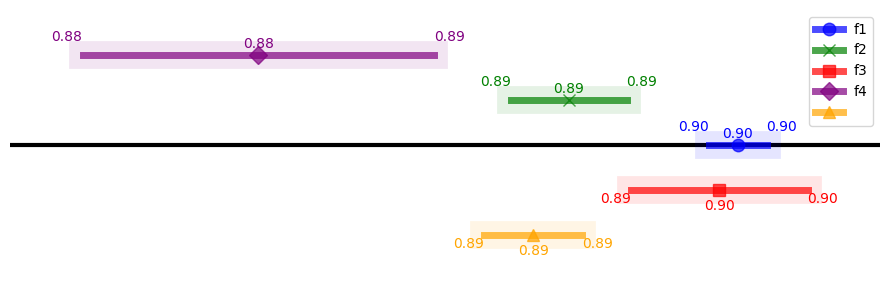

In [82]:
from pyhsics.plotter.plot_measure import MultiMeasurePlotter

MultiMeasurePlotter.from_measures([f1, f2, f3, f4, f_]).plot()

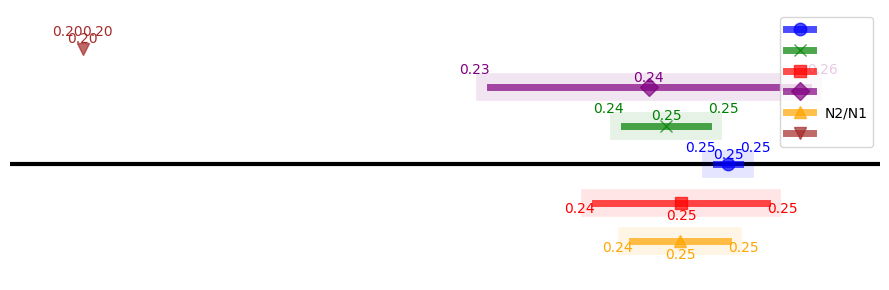

In [81]:
MultiMeasurePlotter.from_measures([N_calc_12, N_calc_6,N_calc_4, N_calc_2, N_mean, N_teo]).plot()

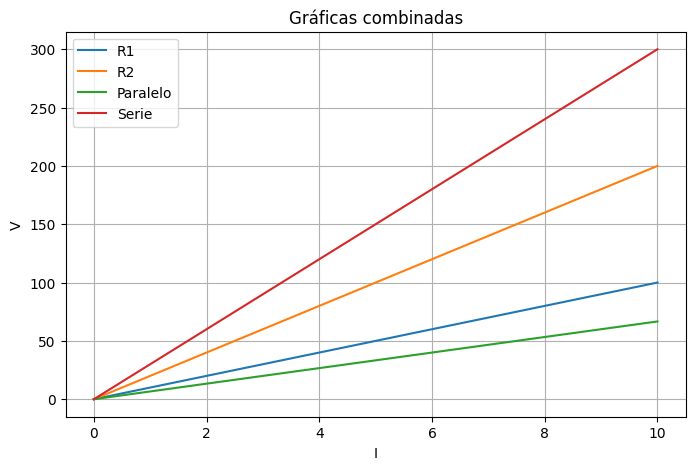

In [2]:
from pyhsics.plotter import Plotter, MultiPlotter


R1 = Quantity(10, 'ohm')
R2 = Quantity(20, 'ohm')

R_paralelo = (R1**-1 + R2**-1)**-1
R_serie = R1 + R2

values = {"R1": R1,
        "R2": R2,
        "Paralelo": R_paralelo,
        "Serie": R_serie}

# Generar un único gráfico combinando las curvas
multi_plot = MultiPlotter({ name: Plotter('V = I*R', 'I', {'R': R}) for name, R in values.items()})
multi_plot.plot((0, 10))

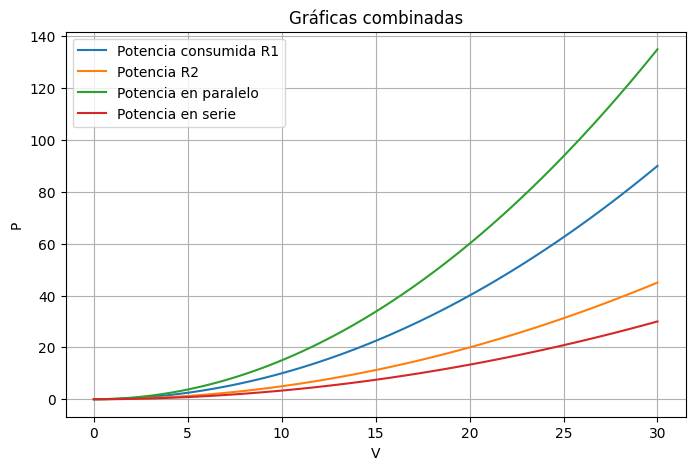

In [3]:

p1 = Plotter('P = V**2/R', 'V', {'R': R1})
p2 = Plotter('P = V**2/R', 'V', {'R': R2})
p3 = Plotter('P = V**2/R', 'V', {'R': R_paralelo})
p4 = Plotter('P = V**2/R', 'V', {'R': R_serie})

# Generar un único gráfico combinando las curvas
multi_plot = MultiPlotter({
    "Potencia consumida R1": p1,
    "Potencia R2": p2,
    "Potencia en paralelo": p3,
    "Potencia en serie": p4
})
multi_plot.plot((0, 30))


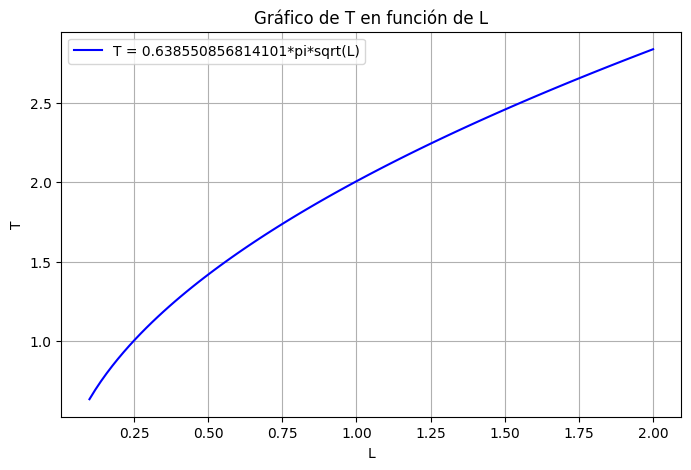

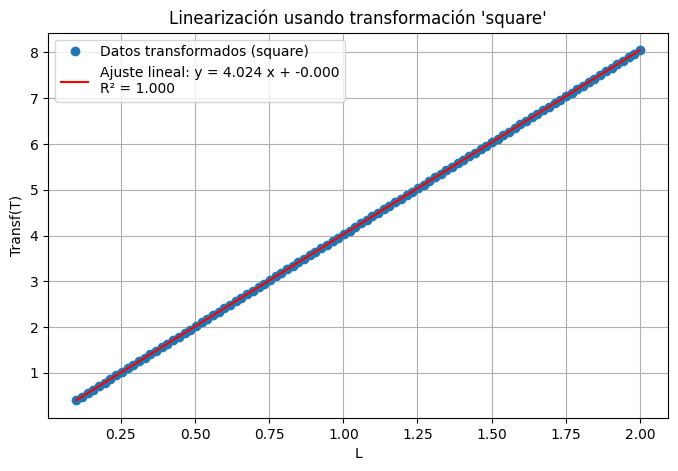

,Transformacion,Pendiente,Pendiente_Simbolica,Interseccion,Interseccion_Simbolica,R2,Ecuacion
0,square,4.024304,0.407747196738022*pi**2,-7.613056e-16,0,1.0,y = 4.024 x + -0.000


In [4]:
# Ejemplo: Periodo de un péndulo simple
p_pendulo = Plotter('T = 2*pi*sqrt(L/g)', 'L', {'g': 9.81})
# Primero se grafica la función original
p_pendulo.plot((0.1, 2))

# Linearizamos y obtenemos los parámetros del ajuste lineal
df_regresion = p_pendulo.linearize((0.1, 2))
(df_regresion)


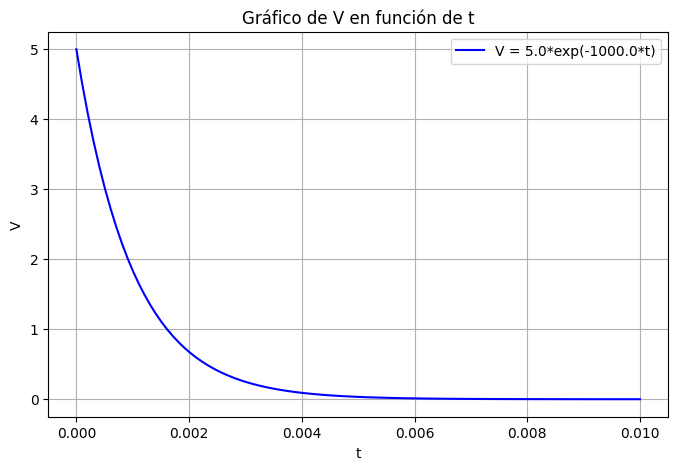

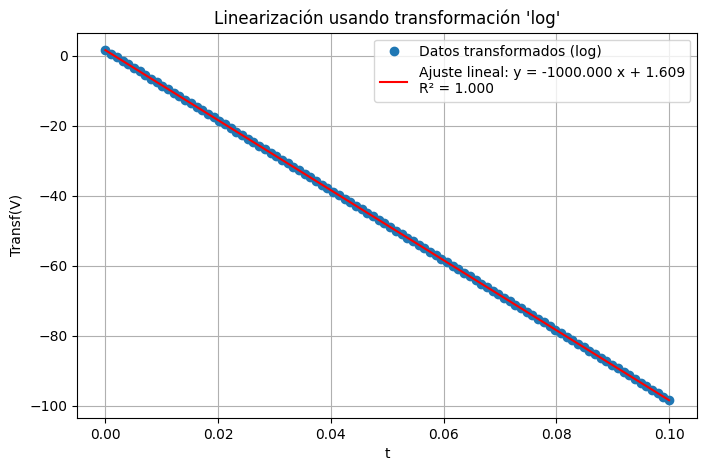

,Transformacion,Pendiente,Pendiente_Simbolica,Interseccion,Interseccion_Simbolica,R2,Ecuacion
0,log,-1000.0,nan,1.609438,nan,1.0,y = -1000.000 x + 1.609


In [5]:
# Ejemplo: Descarga de un capacitor
p_capacitor = Plotter('V = (V0*exp(-t/(R*C)))', 't', {'V0': 5, 'R': 1000, 'C': 1e-6})
p_capacitor.plot((0, 0.01))  # Graficar en el intervalo de tiempo adecuado (en segundos)

p_capacitor.linearize((0,0.1))


In [6]:
ro_cu = Quantity(8.93, 'g/cm**3')
M_cu = Quantity(63.5, 'g/mol')
Na = Constants().Na
r = Quantity(1.2, 'mm')
I1 = Quantity(5, 'A')
pi = Constants().PI
q = Constants().e_

S = pi*r**2
J = I1/S
n = ro_cu*Na / M_cu

vd = I1 /(q*n*S)

vd

<IPython.core.display.Latex object>

In [7]:
E = Quantity(6, 'MeV')
I1 = Quantity(800, 'uA')
r = Quantity(1.5, 'mm')
mp = Constants().mp_
t = Quantity(3, 's')

S = pi*r**2
v2 = (2*E/mp)
vd = v2**(1/2)

n = I1 / (vd*q*S)


# I = Q/t -> Q = I*t -> Q / q_p+ = n

Q = I1 * t
round(Q/q)

<IPython.core.display.Latex object>

In [8]:
I1 = Quantity(5, 'A')
S_ZY_vec = Vector([0, 
                   0.2*cos(rad(60)), 
                   0.2*sin(rad(60))])
S_X_vec = Vector([0.1, 0,0])

S_vec = S_X_vec.cross(S_ZY_vec)
S = VectorQuantity(S_vec, 'm**2')
B = VectorQuantity([0,1.5, 0], 'T')

(I1*S.cross(B))

<IPython.core.display.Latex object>

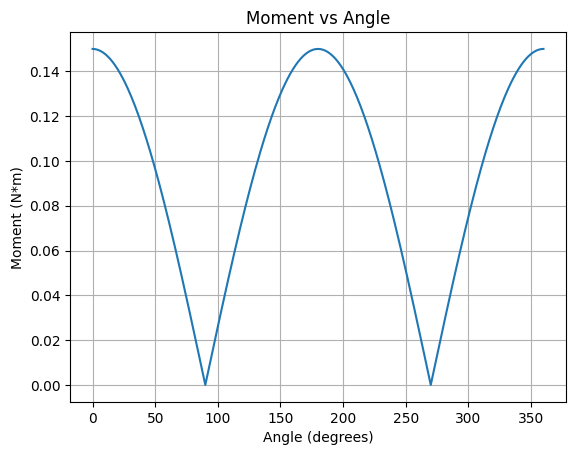

In [9]:

import matplotlib.pyplot as plt


angles = list(range(361))
moments = []

for i in angles:
    S_ZY_vec = Vector([0, 
                    0.2*cos(rad(i)), 
                    0.2*sin(rad(i))])
    S_vec = S_X_vec.cross(S_ZY_vec)
    S = VectorQuantity(S_vec, 'm**2')
    moment = I1 * S.cross(B)
    moments.append(moment.value.magnitude)

plt.plot(angles, moments)
plt.xlabel('Angle (degrees)')
plt.ylabel('Moment (N*m)')
plt.title('Moment vs Angle')
plt.grid(True)
plt.show()

In [10]:
densidad_Cu = Quantity(8.93, '(g/cm**3)')
masamolar_Cu = Quantity(63.5, '(g/mol)')
radio = Quantity(1.2,'(mm)')
current = Quantity(5, '(A)')
Na = Constants().Na
e_ = Constants().e_
pi = Constants().PI
values: dict[str, Quantity] = {
    'd': densidad_Cu,
    'M': masamolar_Cu,
    'r': radio,
    'I_n': current,
    'Na': Na,
    'e': e_,
    'pi': pi
}

(e_ * Na)

<IPython.core.display.Latex object>

In [11]:
(Unit('s*A'))

<IPython.core.display.Latex object>

In [12]:
n = densidad_Cu * Na / masamolar_Cu
n # cargas / m^3 

<IPython.core.display.Latex object>

In [13]:
v = current / (e_ * n * pi * radio **2)
(v)

<IPython.core.display.Latex object>

In [14]:
RA = Quantity(6, 'ohm')
RB = Quantity(6, 'ohm')
RC = Quantity(4, 'ohm')
RD = Quantity(5, 'ohm')
RE = Quantity(20, 'ohm')

R12 = (1/RA + 1/RB)**-1
R345 = (1/RC + 1/RD + 1/RE)**-1

I1 = Quantity(1.2, 'A') 

(I1*(R12 + R345))

<IPython.core.display.Latex object>

In [15]:
r3 = Quantity(1/2,'mm')
L1 = Quantity(1,'m')
ro = Quantity(1.7e-8, 'ohm * m')
R = ro * L1 / (2*pi*r3**2)
(R)

<IPython.core.display.Latex object>

In [16]:
(Unit('ohm*m*m'))

<IPython.core.display.Latex object>

In [17]:
d1 = Quantity(3/2, 'mm')
d2 = Quantity(1/2, 'mm')
S = pi * (d1**2 - d2**2)


L = R * S / ro
(L)

<IPython.core.display.Latex object>

In [18]:
RA = Quantity(10, 'ohm')
RB = Quantity(2, 'ohm')
RC = Quantity(5, 'ohm')
RD = Quantity(18, 'ohm')

Rg = RA+RC
Rb = RB+RD
Req = (1/(Rg) + 1/(Rb))**-1
#R345 = (1/R3 + 1/R4 + 1/R5)**-1

I1 = Quantity(14, 'A') 
V_AB = I1*(Req)
I_goi = V_AB/Rg
I_behe = V_AB/Rb

Req, V_AB, I_behe, I_goi

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(, , , )

In [58]:
A=DirectMeasure(10.29183772, 02.6499999999999, 'kg')
from pyhsics.measure.operator_measure import MeasureAlgebraicOperator as MAO

B = DirectMeasure(1, 0, '1')

(v1, e1, unit1), (v2, e2, unit2) = MAO._init(A,B)
new_value  = abs(v1 * v2)
print(new_value)
rel_error1 = e1 / abs(v1) if v1 else 0
print(rel_error1)

rel_error2 = e2 / abs(v2) if v2 else 0
print(rel_error2)

new_error = new_value * sqrt(rel_error1 ** 2 + rel_error2 ** 2)
print(new_error)



10.0
0.3
1.0
10.44030650891055


In [20]:
V_AB + (I_behe*RB- I_goi *RA)

<IPython.core.display.Latex object>

In [21]:
Quantity(27.9, 'kJ') == Quantity(30**2 + 30**3, 'W*s')

True

In [22]:
C = Quantity(20, 'uF')
V = Quantity(200, 'V')
R = Quantity(1000, 'ohm')
t = Quantity(10, 'ms')
e = Constants().E
Q = V * C*(e ** -(t / (R*C)))
Q

<IPython.core.display.Latex object>

In [23]:
mL = ScalarQuantity(1, 'mL')
mL

<IPython.core.display.Latex object>

In [24]:
cm3 = ScalarQuantity(1, 'cm**3')
cm3.value.value, cm3.units.composition.unit_dict
mL

<IPython.core.display.Latex object>

In [25]:
print(Unit('V*F'))

C


In [26]:
eps1 = Quantity(18, 'V')
eps2 = Quantity(6, 'V')
RA = Quantity(4, 'ohm')
RB = Quantity(6, 'ohm')
RC = Quantity(8, 'ohm')

In [27]:
I1 = Quantity(115, 'A')
r = Quantity(0.85, 'cm')
d = Quantity(0.55, 'cm')
pi = Constants().PI
mu0 = Constants().mu0
j = I1/(pi*r**2)
B = mu0*I1*d/(2*pi*r**2)
B

<IPython.core.display.Latex object>

In [28]:
B = VectorQuantity([0,0,-1.2], 'T')
v = VectorQuantity([5e4, 0, 0], 'm/s')
q = Constants().e_
Unit('V/m = V/m')
E = -v.cross(B)
(E.units)

<IPython.core.display.Latex object>

In [29]:
from math import tan, acos

m = Quantity(1,'g')
l = Quantity(55, 'cm')
E = Quantity(15e3, 'N/C= N/C')
dy = l - Quantity(12, 'cm')
g = Quantity(9.81, 'm/s**2')
tht = acos(dy/l)
(m*g*tan(tht)/E)


<IPython.core.display.Latex object>

In [30]:
from math import log
t = Quantity(4, 's')
C = Quantity(2, 'uF')
eps = Quantity(50, 'V')
Vr = Quantity(20, 'V')
Vc = eps-Vr
Q0 = V*C
Q4 = Vc*C
-t / (C*log(1-Vc/eps))

<IPython.core.display.Latex object>

In [31]:
B = Quantity(0.1, 'T')
E = Quantity(500, 'kV/m')
v = E/B
v

<IPython.core.display.Latex object>

In [32]:
B = Quantity(0.3, 'T')
L = Quantity(32, 'cm')
r = Quantity(0.9, 'cm')
I1 = Quantity(4.5, 'A')

n = B / (mu0 * I1) * L
(n)

<IPython.core.display.Latex object>

In [33]:
RA = Quantity(10, 'Ohm')
RB = Quantity(5, 'Ohm')
RC = Quantity(3, 'Ohm')
RD = Quantity(6, 'Ohm')
RE = Quantity(2, 'Ohm')
RF = Quantity(20, 'Ohm')
Vab = Quantity(100, 'V')

R_23 = (RB**-1 + RC**-1 + RD**-1)**-1
R_goi = R_23 + RE
R_tot = ((R_goi)**-1 + RF**-1)**-1

I_tot = Vab/RA
V_24 = I_tot*R_tot
I_goi = V_24/(R_23 + RE)
V_CD = I_goi * R_23
V_CD

<IPython.core.display.Latex object>

In [34]:
# LABURRA

V = DirectMeasure(5.00, 0.01, 'V')
I1 = DirectMeasure(4.99, 0.01, 'mA')
I2 = DirectMeasure(4, 1, 'uA')

values = {
    'V': V,
    'I1': I1,
    'I2': I2
}

R_1k = CalculatedMeasure('V/I1', values)
R_1M = CalculatedMeasure('V/I2', values)

R_1k, (R_1M)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(, )

In [35]:
### 100 eta 200 Ω-eko erresistentziak

R1 = DirectMeasure(99.2, 0.1, 'ohm')
R2 = DirectMeasure(100, 1, 'ohm')

VR1 = DirectMeasure(2.52, 0.01, 'V')
VR2 = DirectMeasure(2.52, 0.01, 'V')
VR13 = DirectMeasure(5.05, 0.01, 'V')
print(VR1 + VR2 == VR13)

CalculatedMeasure('R1 + R2', {'R1': VR1, 'R2': VR2})


True


<IPython.core.display.Latex object>

In [36]:
### 100 eta 200 kΩ-eko erresistentziak

R1 = DirectMeasure(99.6, 0.1, 'kohm')
R2 = DirectMeasure(100.1, 0.1, 'kohm')

VR1 = DirectMeasure(2.51, 0.01, 'V')
VR2 = DirectMeasure(2.52, 0.01, 'V')
VR13 = DirectMeasure(5.05, 0.01, 'V')

print(VR1 + VR2 == VR13)

VR1 + VR2

True


<IPython.core.display.Latex object>

In [37]:
### 100 eta 200 MΩ-eko erresistentziak

R1 = DirectMeasure(1.037, 0.001, 'Mohm')
R2 = DirectMeasure(1.007, 0.001, 'Mohm')

VR1 = DirectMeasure(2.445, 0.01, 'V')
VR2 = DirectMeasure(2.377, 0.01, 'V')
VR13 = DirectMeasure(5.044, 0.01, 'V')

print(VR1 + VR2 == VR13)

VR1 + VR2

True


<IPython.core.display.Latex object>

In [38]:
V = DirectMeasure(452.2, 0.1, 'mV')
I1 = DirectMeasure(47.1, 0.1, 'mA')

values = {
    'V': V,
    'I': I1,
}

R1 = CalculatedMeasure('V/I', values)

R1

<IPython.core.display.Latex object>

In [39]:
eps = Quantity(550, 'V')
r = Quantity(15, 'ohm')
R = Quantity(20, 'ohm')
V_R = Quantity(200, 'V')
m = Quantity(1500, 'kg')
g = Quantity(9.81, 'm/s**2')
v = Quantity(0.1, 'm/s')

# Potentzia mekanikoa = F*v = m*g*v
P_m = m*g*v

# Zirkuituaren intentsitatea kte da:
I1 = V_R/R

# Potentzia elektrikoaren % 98 
# mekanikoa bihurtzen da:
# Pm = Pe*0.98 => 
P_e = P_m/0.98

# Pe = V*I => V = eps' = Pe / I
eps_ = P_e/I1

# Kirchoff (2):
# eps = V_R + eps' + V_r + V_r' 
V_r = I1 * r

V_r_ = eps - V_R - eps_ - V_r

r_ = V_r_ / I1


eps_, r_

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(, )

In [40]:
V_r_

<IPython.core.display.Latex object>

In [41]:
N = Quantity(100)
I1 = Quantity(3, 'A')

a = Quantity(12, 'cm')
b = Quantity(15, 'cm')
r = Quantity(13, 'cm')

mu0 = Constants().mu0
pi = Constants().PI
diametro_espira = b-a
radio_espira = diametro_espira/2

S = pi*radio_espira**2

B = mu0 * N * I1 / (2*pi*r)

B

<IPython.core.display.Latex object>

In [42]:
T_erdia = DirectMeasure(14.06,	0.05, 's')
ln2 = DirectMeasure(0.69315, 0.00001)

values = {'T_erd': T_erdia,
          'ln2': ln2}


RC1 = CalculatedMeasure('RC1 = T_erd / ln2', values)
RC1

<IPython.core.display.Latex object>

In [43]:
malda = DirectMeasure(-0.04942, 0.00040631, '1/(ohm*F)')
RC2 = CalculatedMeasure('RC2 = -1/RC', {'RC': malda})
RC2

<IPython.core.display.Latex object>

In [44]:
R = DirectMeasure(1.05, 0.01, 'Mohm')
R_mul = DirectMeasure(11.07, 0.01, 'Mohm')
R_eq = CalculatedMeasure('R_eq = 1/(1/R_r + 1/R_M)', {'R_r': R, 'R_M': R_mul})
C = DirectMeasure(22, 1, 'uF')
RC3 = CalculatedMeasure('RC3 = R_M*C', {'R_M': R_eq, 'C': C})
RC3

<IPython.core.display.Latex object>

In [45]:
T_erdia = DirectMeasure(60*2 + 28.88,	0.01, 's')
ln2 = DirectMeasure(0.69, 0.01)

values = {'T_E': T_erdia,
          'ln2': ln2}

RC4 = CalculatedMeasure('RC4 = T_E/ln2', values)
RC4

<IPython.core.display.Latex object>

In [46]:
R_mul = DirectMeasure(11.07, 0.01, 'Mohm')
C = DirectMeasure(22, 1, 'uF')
RC5 = CalculatedMeasure('RC5 = R*C', {'R': R_mul, 'C': C})
RC5.as_direct_measure()

<IPython.core.display.Latex object>

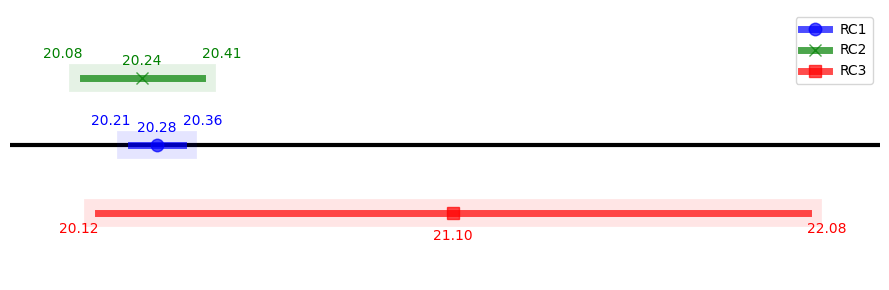

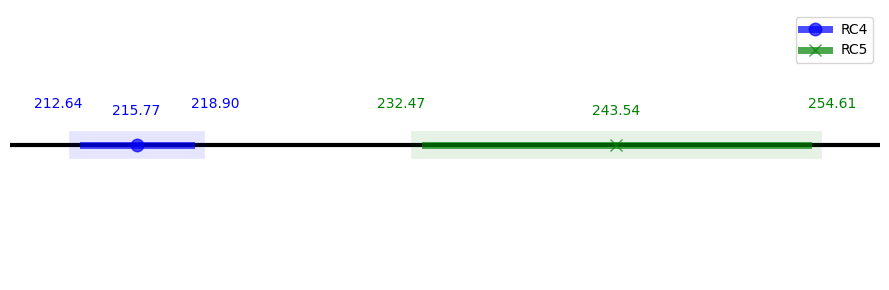

In [47]:
from pyhsics.plotter import MultiMeasurePlotter, MeasurePlotter
measures= [
    RC1,
    RC2,
    RC3
]
measures2= [
    RC4,
    RC5
]

MultiMeasurePlotter.from_measures(measures, True).plot()
MultiMeasurePlotter.from_measures(measures2, False).plot()

In [48]:
RC1 == RC2

True

In [49]:
from pyhsics.quantity.matrix_quantity import MatrixQuantity

M = Matrix([[1,2,3],
        [4,5,6],
        [7,8,9]])

U = Unit('g*mm/ms**2')
MatrixQuantity(M, U)

<IPython.core.display.Latex object>

In [50]:
def triangularice(M: Matrix):
    M[0] = 1
    
    
    
    return M_
    
triangularice(M)    

TypeError: 'Matrix' object does not support item assignment